<h2 style="color:black"> 
QOSF Mentorship Program 2024
</h2>

<h4 style="color:black"> 
Cohort 10 - Screening Tasks
</h4>

##### <span style="color: ROYALBLUE;"> By: Said Carbot Cruz Trejo-ESCOM-IPN-MEX
______________________
<h6 style="color:black"> 
Late October, early November,2024 
</h6>

<h5 style="color:dodgerblue"> 
Task 1 Statevector simulation of quantum circuits  
</h5>

<h5 style="color:green"> 
- Identify
</h5>
<h7 style="color:black"> 
<li>Objetive: implement a statevector simulator for quantum circuits from
scratch.</li>
<br>
<li>There are 3 points:</li>
A) Naive simulation using matrix multiplication
<br>
B) Advanced simulation using tensor multiplication
<br>
C) Bonus question
<br><br>
I have to do all of them.  

Hice dos implementaciones, en la primera comencé creando el estado de vector comenzando con el cálculo del producto "kor" al ket cero n-1 veces como qubits ingresara el usuario para crear,v.g.: si el usuario ingresaba que quería crear 3 qubits,entonces aplicaba |0⟩ ⊗ I ⊗ I.  
A continuación intenté usar las compuertas X,H y CNOT haciendo el producto de cada compuerta con el estado del vector inicial, pero noté que por propiedades de las matrices los productos deberian ser de la forma (n X m)(m X L), y como la matriz del estado del vector tenia la forma (2^q X 1), donde "q" es el número de qubits que ingresó el usuario para crear, entonces no podría hacer la multiplicación de matrices de forma directa, tenía que modificar las compuertas haciendo la misma cantida de  productso "kor" que al inciio hice al estado de vector. v.g. X ⊗ I ⊗ I.  

Ya con las compuertas X para darle la ddimención (2^q X 2^q). V.g. para 3 qubits quedaria (8 X 8), que ya coincide con la matriz del estado vector (8 X 1), asi que ya podía hacer (8 X 8)(8 X 1)= (8 X 1).
Sin embargo 
,pero finalmente no encontré una forma de llenar de ceros la matriz en las secciones que lo necesitara. 

Segundo, la otra implementación que hice fue aplicando primero las transformaciones lineales a cada qubit, y despues apliqué el producto "kor" a los estados finales de cada qubit. 
</h7>


<h5 style="color:green"> 
- Set Up
</h5>
<h7 style="color:black"> 
1. Define ∣0⟩,∣1⟩, and base X, H, CNOT, I and proyectors.<br>
2. Create the base n-qubit quantum state  <br>
3. To apply X gate on a "k" qubit<br>
4. To apply H gate to a "k" qubit<br>
5. To apply CNOT gate to k and m qubits<br>
<br>
<br>
</h7>

<h5 style="color:green"> 
- Execute
</h5>

1. Define ∣0⟩,∣1⟩, and base X, H, CNOT, I and proyectors.

In [5]:
from math import sqrt
import numpy as np

ket0 = np.array([1, 0])

ket1 = np.array([0, 1])

I = np.eye(2)

X = np.array([[0, 1], 
              [1, 0]])

h = 1/sqrt(2)
H = h*np.array([[1, 1], 
                [1, -1]])

CNOT = np.array([[1, 0, 0, 0], 
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# Proyectors
p_0 = np.array([[1, 0], 
                [0, 0]])

p_1 = np.array([[0, 0], 
                [0, 1]])

2. Create the base n-qubit quantum state  

In [ ]:
#Ask the user to enter a integer to cretae the n-qubit quantum state
while True:
    try:
        n = int(input("Please, enter an integer between 1 and 40 for the number of qubit to be creates: "))
        max = 40
        # Check if the number is within the allowed range
        if 0 <= n <= max:
            print(f"You entered {n}.")
            break 
        else:
            print("Error: The number is out of the allowed range (1-20). Please try again.")
    
    except ValueError:
        print("Invalid input! Please enter an integer between 1 and 20.")

# Shape column vector
def convert_to_a_vector_column(state_vector):
    return state_vector.reshape(-1, 1)

#Show the vector
def printQbits(circuito):
    print(circuito)


You entered 3.


In [7]:
#Create and show the base n-qubit quantum state
def initialize_qubits(n):
    # Start with single qubit state |0>
    qubit_state = ket0
    # Multiply by |0> for each additional qubit
    for _ in range(n - 1):
        qubit_state = np.kron(qubit_state, ket0)
    return qubit_state

print(f"The {n}-qubit quantum state is: ")
vectorState = np.array(initialize_qubits(n))
Probability = convert_to_a_vector_column(vectorState)
print(Probability)

The 3-qubit quantum state is: 
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


3. To apply X gate on a k qubit

In [8]:
def aplicar_x_a_qubit(n, target_qubit, initial_state):
    # Build the operator with X at the `target_qubit` position and I at the others
    # Reverse the list so that the qubits match the desired order
    matrices = [X if i == target_qubit else I for i in range(n-1, -1, -1)]

    # Calculate kron product
    operador_final = matrices[0]
    for matriz in matrices[1:]:
        operador_final = np.kron(operador_final, matriz)
    
    # Apply the operator to the initial state
    final_state = operador_final @ initial_state
    return final_state

q_X = int(input("You have {} qubits, numbered 0 to {}. Please enter the number of the qubit you want to apply the X gate to.".format(n,n-1)))
vectorStateX = np.array(aplicar_x_a_qubit(n, q_X, vectorState))
print(f"State after apply X gate on qubit {q_X}:")
# Column vector shape
Probability = vectorStateX
Probability = Probability.reshape(-1, 1)
print(Probability)


State after apply X gate on qubit 0:
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


4. To apply H gate to a k qubit

In [9]:
def aplicar_h_a_qubit(n, target_qubit, initial_state):
    # Build the operator with X at the `target_qubit` position and I at the others
    # Reverse the list so that the qubits match the order
    matrices = [H if i == target_qubit else I for i in range(n-1, -1, -1)]

    # Calculate kron product
    operador_final = matrices[0]
    for matriz in matrices[1:]:
        operador_final = np.kron(operador_final, matriz)
    
    # Apply the operator to the initial state
    final_state = operador_final @ initial_state
    return final_state

q_H = int(input("You have {} qubits, numbered 0 to {}. Please enter the number of the qubit you want to apply the H gate to.".format(n,n-1)))
vectorStateXH = aplicar_h_a_qubit(n, q_H, vectorStateX)
print(f"State after apply H gate on qubit {q_H}:")
# Column vector shape
Probability = vectorStateXH
Probability = Probability.reshape(-1, 1)
print(Probability)

State after apply H gate on qubit 0:
[[ 0.70710678]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


5. To apply CNOT gate to k and m qubits

In [10]:
q_CNOTcontrol = int(input("You have {} qubits, numbered 0 to {}. Please enter the number of the qubit you want to be the control one to apply the CNOT gate.".format(n,n-1)))
q_CNOTtarget = int(input("You have {} qubits, numbered 0 to {}. Please enter the number of the qubit you want to be the target one to apply the CNOT gate.".format(n,n-1)))

def aplicar_CNOT(n, control_qubit, target_qubit, initial_state):
    # Create identity matrices for the final operator
    matrices_control_0 = [I if i != control_qubit else p_0 for i in range(n-1, -1, -1)]
    matrices_control_1 = [I if i != control_qubit else p_1 for i in range(n-1, -1, -1)]
    matrices_control_1 = [X if i == target_qubit else matrices_control_1[i] for i in range(n)]

    # Calculate kron product to built the operator of CNOT gate
    operador_control_0 = matrices_control_0[0]
    operador_control_1 = matrices_control_1[0]
    for i in range(1, n):
        operador_control_0 = np.kron(operador_control_0, matrices_control_0[i])
        operador_control_1 = np.kron(operador_control_1, matrices_control_1[i])

    # Add operators
    operador_CNOT = operador_control_0 + operador_control_1

    # Apply the operator CNOT to the initial state
    final_state = operador_CNOT @ initial_state
    return final_state

vectorStateCNOT = aplicar_CNOT(n, q_CNOTcontrol, q_CNOTtarget, vectorStateXH)
print(f"State after applying CNOT gate with control {q_CNOTcontrol} and target {q_CNOTtarget}:")
# Column vector shape
Probability = vectorStateCNOT
Probability = Probability.reshape(-1, 1)
print(Probability)

State after applying CNOT gate with control 1 and target 0:
[[ 0.70710678]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


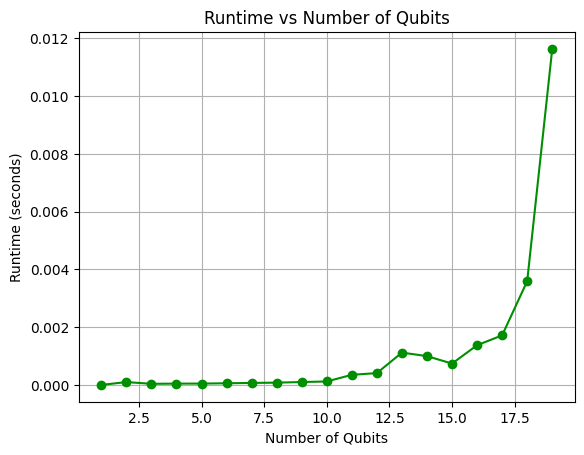

In [12]:
import matplotlib.pyplot as plt
import time
# List to store the number of qubits and their runtimes
qubit_counts = []
runtimes = []

# Test for different numbers of qubits (from 1 to n+1)
for n in range(1, 20): 
    start_time = time.time()  
    
    # Initialize the qubits
    initialize_qubits(n)
    
    end_time = time.time() 
    runtime = end_time - start_time  # Calculate the runtime
    
    qubit_counts.append(n)
    runtimes.append(runtime)

# Plotting the runtime vs number of qubits
plt.plot(qubit_counts, runtimes, marker='o', linestyle='-', color='#008F00')
plt.title('Runtime vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.show()


<h5 style="color:green"> 
- Evaluate
</h5>
<h7 style="color:black"> 

This code simulates basic quantum operations in Python using NumPy for matrix manipulation and linear algebra. It is designed to initialize quantum states, apply gates like X, H, and CNOT to specific qubits, and measure the runtime of these processes depending on the number of qubits, allowing users to observe the scalability and limitations of quantum simulations.

First, the code defines essential vectors and matrices for the simulation. The base states |0⟩ and |1⟩, along with identity matrices and gates like X and Hadamard, are set up to operate on individual qubits and create superpositions. The CNOT gate, which enables entanglement, is also defined for two qubits. Projection matrices are created to represent measurements in the |0⟩ and |1⟩ states.

The initialize_qubits(n) function establishes a base state where all qubits start in |0⟩. It uses the Kronecker product to combine these individual qubit states into a single system state, enabling initialization of systems with any number of qubits.

Next, functions are included to apply gates to specific qubits in the system. apply_x_to_qubit and apply_h_to_qubit construct an operator with the specified gate in the position of the target qubit, filling in identity matrices for the other qubits, then combining them with the Kronecker product. This allows applying the effect of the X or H gate to the entire system.

The code also includes a function to apply the CNOT gate between two qubits, using projection matrices to conditionally apply the X gate to the target qubit based on the control qubit's state. 

All gates by its forms using kron produtc, v.g. CNOT == ∣0⟩⟨0∣⊗I + ∣1⟩⟨1∣⊗X 

Finally, the code performs a performance analysis, measuring the initialization time for an n-qubit system and plotting how computational load grows with system size. This helps visualize scalability limitations based on memory and computational performance.

On the other hand,the code concludes with a practical estimate of the number of qubits that can be simulated on a classical computer, given memory constraints. This is useful, as larger systems require exponentially more memory to store quantum state amplitudes.
A basic approximation for determining how many qubits my classical computer can simulate is based on the amount of memory available to store the system matrices. Since the quantum state of an n-qubit system has 2^n amplitudes, the number of qubits my computer can handle is directly related to its memory capacity.

For a computer with M(for Mac) GB of RAM available to store the quantum amplitude vectors, it is possible to estimate the maximum number of qubits n that it can simulate using the following formula:

2^n X (size in bytes per width) <= M X 10^9

Generaly are 8 bytes per width, so each complex number use two 4 bytes, one for the real and the second for the imaginary part. 

v.g.2^n X 8 <= 16 X 10^9

Where n <= log_2 (2 X 10^9) +/-= 30.8, wchich is the number of qubits. My computer cannot handdle 40 qubits, the kernel always stopped.
</h7>


REFERENCES
1) Quantum Computing Stack Exchange. (s.f.). How to represent a CNOT gate operating on three-qubit states as a matrix? Quantum Computing Stack Exchange. Recuperado de https://quantumcomputing.stackexchange.com/questions/17599/how-to-represent-a-cnot-gate-operating-on-three-qubit-states-as-a-matrix
2) Wikipedia. (s.f.). Operador de proyección. Recuperado de https://es.wikipedia.org/wiki/Operador_de_proyección
3) Quantum Computing Stack Exchange. (s.f.). How to derive the CNOT matrix for a 3-qubit system where the control target qubit? Quantum Computing Stack Exchange. Recuperado de https://quantumcomputing.stackexchange.com/questions/4252/how-to-derive-the-cnot-matrix-for-a-3-qubit-system-where-the-control-target-qu
4) Baaquie, B. E., & Kwek, L.-C. (s.f.). Quantum Computers: Theory and Algorithms.

##### <span style="color: ROYALBLUE;"> By: Said Carbot Cruz Trejo-ESCOM-IPN-MEX


Annexes:
This is the second approach, which I couldn't get to work, for now.  
It has preload the entanglement example for a 2 qubits system, so first X, next H and last 
<span style="font-size: normal;">CNOT<sub>0,1</sub></span> 

In [ ]:
# Steps A,B,C are the same than the main approach.

#Showing all the qubits
circuito = initialize_qubits(2)
print("Base state")
printQbits(circuito)
print("\n")

#D. To apply X gate on a n qubit
qq_X = 0
circuito[qq_X] = X @ circuito[qq_X]
printQbits(circuito)
print("You have applied X gate to the qubit number ",(qq_X))
print("\n")

#E. To apply H gate to a n qubit
qq_H = 0
circuito[qq_H] = H @ circuito[qq_H]
printQbits(circuito)
print("You have applied H gate to the qubit number ",(qq_H))
print("\n")

#F. To apply CONOT gate to n and m qubits
qq_CNOTcontrol = 0
qq_CNOTtarget = 1
#1) kron for control and target
kron = np.kron(circuito[qq_CNOTcontrol],circuito[qq_CNOTtarget])
#2) Linear transformation based on the past kron
result = CNOT @ kron
#3)Add to a column vector 
TargetResult = np.array([result[2],result[3]])
#4) Aadir ese vector columna en el circuito 
circuito[qq_CNOTtarget] = TargetResult  
printQbits(circuito)
print("You have applied CNOT gate to the qubit number ",(q_H))
print("\n")

#G. Calculate final probability
#Apply the tensor product to all elements of the circuit 
Probability = circuito[0]
for i in range(1,2):
    Probability = np.kron(Probability, circuito[i])

# Column vector shape
Probability = Probability.reshape(-1, 1)

# Print final result
print("Final Probability is:")
print(Probability)
